In [25]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 8)

In [14]:
df = pd.read_csv(r'C:/Users/Jinyoung/Pictures/python_analysis/fc_preprocessing/rawdata/part1/판매실적통합본.csv', engine='python')

In [15]:
# 제품군별 수량합계 계산
grouped_df = df.groupby(['제품군'], as_index=False)['수량'].sum()

In [16]:
grouped_df.head()

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323


In [19]:
# 기타 행 추가
other_row = pd.DataFrame({'제품군' : ['기타'], '수량' : [grouped_df.sort_values(by='수량')['수량'].iloc[:4].sum()]})

grouped_df = pd.concat([grouped_df, other_row], axis=0, ignore_index=True)
grouped_df = grouped_df.sort_values(by='수량', ascending=False).iloc[:3]

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774
6,기타,1198236
7,기타,1198236
8,기타,1198236


([<matplotlib.patches.Wedge at 0x268553e5c40>,
 [Text(0.5253533234192633, 0.46260553992827924, '제품 1'),
  Text(-0.5914878359773625, 0.3743556329091586, '제품 2'),
  Text(-0.5299960450070683, -0.4572791185664019, '제품 3'),
  Text(-0.4190350074328276, -0.5607224469786902, '제품 4'),
  Text(-0.3559798963441506, -0.6027257364662701, '제품 5'),
  Text(-0.29121985112298115, -0.6365461478258341, '제품 6'),
  Text(-0.025891803517903416, -0.6995209893281189, '기타'),
  Text(0.3987783339998608, -0.5753049976597591, '기타'),
  Text(0.664120788943296, -0.22123195450326372, '기타')],
 [Text(0.4503028486450829, 0.3965190342242394, '23.0%'),
  Text(-0.5069895736948822, 0.3208762567792788, '36.1%'),
  Text(-0.4542823242917729, -0.3919535301997731, '4.5%'),
  Text(-0.35917286351385225, -0.48061924026744873, '2.4%'),
  Text(-0.3051256254378434, -0.5166220598282315, '1.1%'),
  Text(-0.24961701524826957, -0.5456109838507149, '2.2%'),
  Text(-0.022192974443917216, -0.5995894194241019, '10.2%'),
  Text(0.3418100005713092,

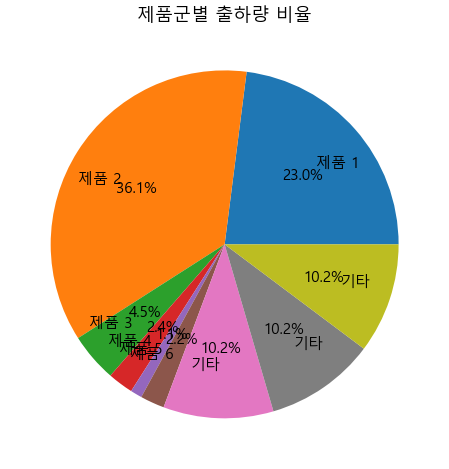

In [26]:
plt.title('제품군별 출하량 비율')
plt.pie(x = grouped_df['수량'], 
        labels = grouped_df['제품군'],
        labeldistance=0.7,
        autopct = '%1.1f%%'
       )